## Загрузка и подготовка библиотеки keras-retinanet

In [1]:
if 1:
    !apt-get update && apt-get install -y git
    !git clone https://github.com/fizyr/keras-retinanet.git
    !cd keras-retinanet \
        && git reset --hard abe89380835bc06dff3b97e69fa2b19dd7fd97a8 \
        && pip install . \
        && python setup.py build_ext --inplace

Get:1 file:/var/nvinfer-runtime-trt-repo-5.0.2-ga-cuda10.0  InRelease
Ign:1 file:/var/nvinfer-runtime-trt-repo-5.0.2-ga-cuda10.0  InRelease
Get:2 file:/var/nvinfer-runtime-trt-repo-5.0.2-ga-cuda10.0  Release [574 B]
Get:2 file:/var/nvinfer-runtime-trt-repo-5.0.2-ga-cuda10.0  Release [574 B]
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease                        
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]    
Get:6 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]      
Ign:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:8 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:9 http://security.ubuntu.com/ubuntu bionic-security/restricted amd64 Packages [44.6 kB]
Ign:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Get:12 http:

  Created wheel for keras-retinanet: filename=keras_retinanet-0.5.1-cp36-cp36m-linux_x86_64.whl size=167695 sha256=30a6ec7a6e31587fcf170bb8c0a911433a2bdf131ea6ac3a01d26441696c3329
  Stored in directory: /tmp/pip-ephem-wheel-cache-v7b4i192/wheels/e6/8f/1e/e89fd071bea877666f0929db33e5a623af8eafccf6c6fe9b9c
  Created wheel for keras-resnet: filename=keras_resnet-0.1.0-py2.py3-none-any.whl size=14131 sha256=2081bf414e3ad14cebcf36cc945d25a69edce2c5513a16169ad48dd65fee8102
  Stored in directory: /tmp/pip-ephem-wheel-cache-v7b4i192/wheels/75/c9/9d/baa97da8619f44e26ec79be6c56c9d032979966619ee135856
  Created wheel for pyyaml: filename=PyYAML-5.3.1-cp36-cp36m-linux_x86_64.whl size=45919 sha256=8ffef5dd73c4cb8aff31c82550cc3b38458eb1aec17ef2de089da104d9058342
  Stored in directory: /tmp/pip-ephem-wheel-cache-v7b4i192/wheels/e5/9d/ad/2ee53cf262cba1ffd8afe1487eef788ea3f260b7e6232a80fc
Successfully built keras-retinanet keras-resnet pyyaml
running build_ext
skipping 'keras_retinanet/utils/compute_ov

## Справка по скрипту обучения модели

In [2]:
# Если надо посмотреть хелпу к keras_retinanet'у
if 0:
    !python keras-retinanet/keras_retinanet/bin/train.py -h

## Загрузка предобученной модели

In [3]:
# Скачать нужно только раз, для этого нужно 0 заменить на 1
if 0:
    !apt-get update && apt-get install -y aria2
    !aria2c -x12 "https://github.com/fizyr/keras-retinanet/releases/download/0.5.1/resnet50_coco_best_v2.1.0.h5"

## Обучение модели для детектирования объектов

In [4]:
%%time
!python keras-retinanet/keras_retinanet/bin/train.py \
    --random-transform \
    --weights "./resnet50_coco_best_v2.1.0.h5" \
    --steps 100 \
    --epochs 20 \
    csv "data/converted/annotations.csv" "data/converted/classes.csv"

Using TensorFlow backend.
Creating model, this may take a second...
W0422 14:43:02.294287 139715352217408 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4070: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:1319: UserWarning: Skipping loading of weights for layer classification_submodel due to mismatch in shape ((3, 3, 256, 18) vs (720, 256, 3, 3)).
  weight_values[i].shape))
/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:1319: UserWarning: Skipping loading of weights for layer classification_submodel due to mismatch in shape ((18,) vs (720,)).
  weight_values[i].shape))
2020-04-22 14:43:06.502785: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library libcuda.so.1
2020-04-22 14:43:07.602166: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x69d7530 executing comp

W0422 14:43:23.683330 139715352217408 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.

Epoch 1/20
2020-04-22 14:43:31.141359: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library libcudnn.so.7
100/100 [==============================] - 47s 470ms/step - loss: 1.9115 - regression_loss: 0.7776 - classification_loss: 1.1339

Epoch 00001: saving model to ./snapshots/resnet50_csv_01.h5
Epoch 2/20
100/100 [==============================] - 36s 357ms/step - loss: 1.1230 - regression_loss: 0.4849 - classification_loss: 0.6382

Epoch 00002: saving model to ./snapshots/resnet50_csv_02.h5
Epoch 3/20
100/100 [==============================] - 36s 356ms/step - loss: 0.6040 - regression_loss: 0.4212 - classification_loss: 0.1827

Epoch 00003: saving model to ./snapshots/resnet50_csv_03.h5
Epoch 4/2

### Лучший лосс был на 18 эпохе:  
loss: 0.2633 - regression_loss: 0.2370 - classification_loss: 0.0263  
файл: ./snapshots/resnet50_csv_18.h5

## Конвертация обученной модели для инференса

In [5]:
!python keras-retinanet/keras_retinanet/bin/convert_model.py \
    'snapshots/resnet50_csv_18.h5' \
    'snapshots/inference_model.h5'

Using TensorFlow backend.
W0422 15:02:28.756257 140193236473664 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4070: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

2020-04-22 15:02:32.376789: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library libcuda.so.1
2020-04-22 15:02:32.457202: E tensorflow/stream_executor/cuda/cuda_driver.cc:318] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2020-04-22 15:02:32.457312: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: 5338deac964a
2020-04-22 15:02:32.457359: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: 5338deac964a
2020-04-22 15:02:32.457574: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 410.48.0
2020-04-22 15:02:32.457683: I tensorflow/stream_executor/c

## Загрузка необходимых библиотек

In [7]:
!pip install imageio

     |████████████████████████████████| 3.3 MB 305 kB/s eta 0:00:01


In [8]:
import time
import imageio
from matplotlib import pyplot as plt
import matplotlib.patches as patches

from keras_retinanet.models import load_model
from keras_retinanet.utils.image import preprocess_image, resize_image
from keras_retinanet.utils.colors import label_color

## Загрузка модели для инференса

In [9]:
model = load_model('snapshots/inference_model.h5', backbone_name='resnet50')

Using TensorFlow backend.


tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_1:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_2:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_3:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_4:0' shape=(9, 4) dtype=float32> anchors


W0422 15:04:48.286963 140612099888960 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4070: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0422 15:04:50.933691 140612099888960 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/keras_retinanet/backend/tensorflow_backend.py:104: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


## Загрузка словаря с метками классов

In [10]:
labels_to_names = {}
with open('data/converted/classes.csv') as f:
    for line in f:
        cls_name, cls_id = line.split(',')
        labels_to_names[int(cls_id.strip())] = cls_name.strip()
print(labels_to_names)

{0: 'zombie', 1: 'airplane'}


## Функция применения модели для детектирования объектов

In [11]:
def detect_objects(image):    
    image_processed = preprocess_image(image[:,:,::-1].copy())
    image_processed, scale = resize_image(image_processed)

    start = time.time()
    boxes, scores, labels = model.predict(image_processed[None, ...])
    print("Processing time: ", time.time() - start)
    boxes /= scale
    return boxes[0], scores[0], labels[0]

## Функция визуализации результатов детектирования объектов

In [30]:
def draw_predictions(image, predictions=None):
    draw = image.copy()
    fig, ax = plt.subplots(1, figsize=(12, 12))
    ax.imshow(draw)

    if predictions is None:
        return
        
    boxes, scores, labels = predictions
    SCORE_THRESHOLD = 0.39
    for box, score, label in zip(boxes, scores, labels):
        if score < SCORE_THRESHOLD:
            break

        box_y = int(box[1])
        box_x = int(box[0])
        box_h = int(box[3]-box[1])
        box_w = int(box[2]-box[0])
        caption = "{} {:.3f}".format(labels_to_names[label], score)
        if 0:
            color = [x/255 for x in label_color(label)]
        else:
            color =  [(0, 1, 0), (1, 1, 0), (1, 0, 1), (1, 0, 0)][label]

        label_size = 20
        plt_scale = float(fig.get_size_inches()[1]) * fig.dpi * draw.shape[0] * label_size / 12545280
        ax.add_patch(patches.Rectangle((box_x, box_y), 
                                 box_w, box_h, 
                                 linewidth=2, edgecolor=color, facecolor='none'))
        ax.add_patch(patches.Rectangle((box_x, box_y-round(26*plt_scale)), 
                                 round(plt_scale*len(caption)*14), round(26*plt_scale), 
                                 linewidth=2, edgecolor=color, facecolor=color))
        ax.text(box_x + round(3*plt_scale), box_y - round(5*plt_scale), caption, fontsize=label_size)


## Детектирование объектов на тестовых изображениях

### На знакомых объектах модель отработала очень хорошо

Processing time:  0.0946195125579834


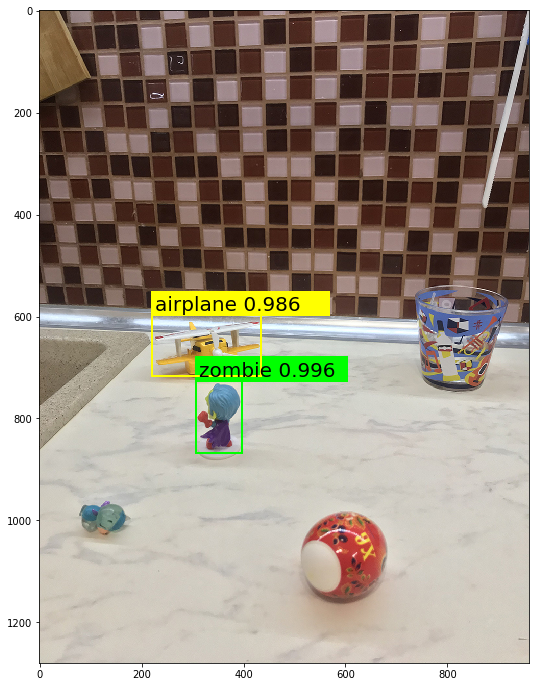

In [31]:
image = imageio.imread('data/converted/test_1.jpg')
predictions = detect_objects(image)
draw_predictions(image, predictions)

Processing time:  0.09684324264526367


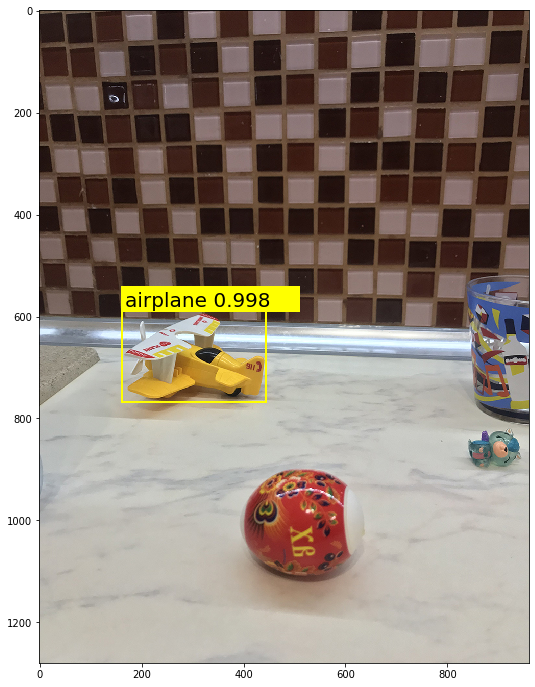

In [32]:
image = imageio.imread('data/converted/test_2.jpg')
predictions = detect_objects(image)
draw_predictions(image, predictions)

### Забавно, при добавлении новых игрушек, которых не было в обучающем датасете, выявляются интересные закономерности, игрушка которая представляет из себя "собаку с крыльями" модель окрестила и самолетом и зомби. Другие же игрушки, даже машинки, в подавляющем большинстве определяются как зомби

Processing time:  0.09994339942932129


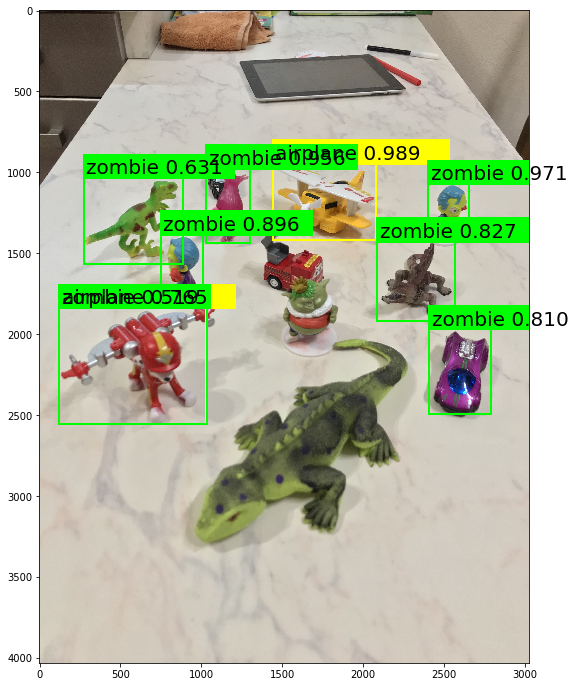

In [33]:
image = imageio.imread('data/converted/test_3.jpg')
predictions = detect_objects(image)
draw_predictions(image, predictions)

Processing time:  0.09180879592895508


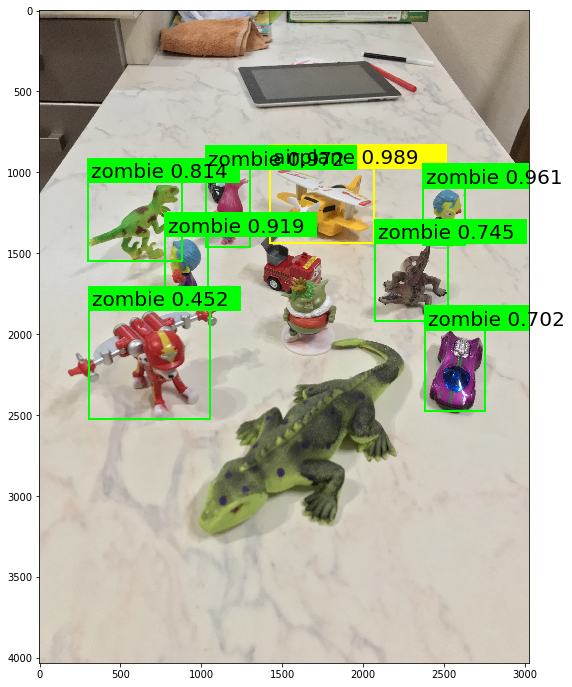

In [34]:
image = imageio.imread('data/converted/test_4.jpg')
predictions = detect_objects(image)
draw_predictions(image, predictions)

Processing time:  0.09111881256103516


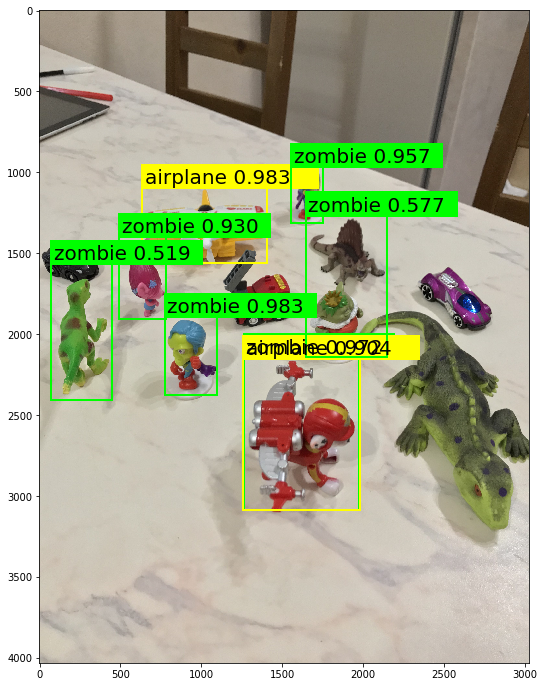

In [35]:
image = imageio.imread('data/converted/test_5.jpg')
predictions = detect_objects(image)
draw_predictions(image, predictions)

### Случайно попавшая в кадр собака тоже зомби, почему бы и нет? :)

Processing time:  0.08616399765014648


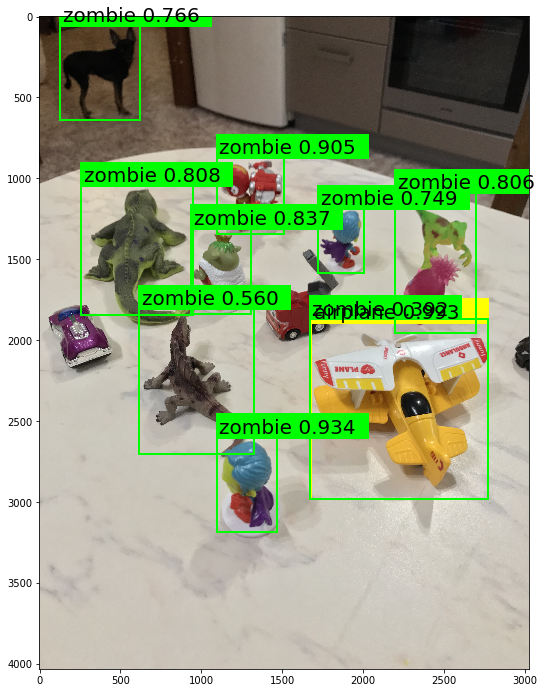

In [36]:
image = imageio.imread('data/converted/test_6.jpg')
predictions = detect_objects(image)
draw_predictions(image, predictions)

### Вот он настоящий зомби. ROFL  
Пришлось понизить порог SCORE_THRESHOLD до 0.39

Processing time:  0.1106421947479248


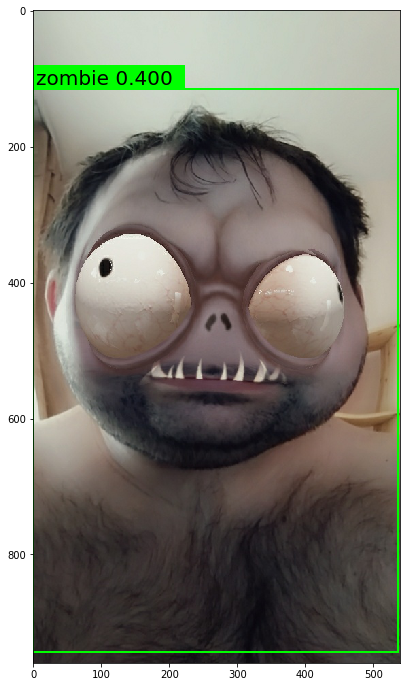

In [38]:
image = imageio.imread('data/converted/test_100500.jpg')
predictions = detect_objects(image)
draw_predictions(image, predictions)